In [2]:
import os
import sys
from dotenv import load_dotenv

load_dotenv()
sys.path.append(os.environ.get('PATH_CUSTOM_MODULES'))

import augment_image
import tensorflow as tf

### Prepare all the variable

In [3]:
path_source = os.environ.get('PATH_DATASET_DESTINATION')

In [4]:
dataset_names = ['rimone', 'g1020', 'refuge', 'papila']
scenario_names = ['scenario_1', 'scenario_2', 'scenario_3', 'scenario_4', 'scenario_5']
folds_name = ['fold_1', 'fold_2', 'fold_3', 'fold_4', 'fold_5']

In [5]:
path_dataset = {}
for scenario in scenario_names:
    for dataset in dataset_names:
        path_dataset[scenario + '_' + dataset] = os.path.join(path_source, scenario, dataset)

### Scenario 1
#### Show Image

In [5]:
rimone_image_label = augment_image.get_image(source_path=os.path.join(path_source_rimone,
                                                                    folds_name[0],
                                                                    'train'),
                                            img_size=300,
                                            color_mode='rgb',
                                            batch_size=32)

Found 349 files belonging to 2 classes.


In [6]:
rimone_image_label

<BatchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [7]:
temp_data = iter(rimone_image_label)

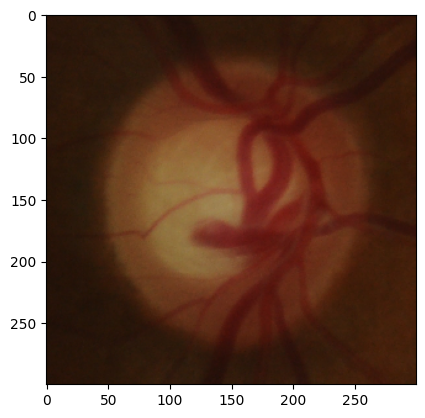

In [8]:
import matplotlib.pyplot as plt
plt.imshow(next(temp_data)[0][0].numpy().astype('uint8'))

In [9]:
for index, unbatched in enumerate(rimone_image_label.unbatch()):
    # print(len(unbatched))
    # print(unbatched[0].shape)
    # print(unbatched[1].shape)
    index += 1
print(index)

349


In [10]:
image, label = unbatched

In [11]:
len(rimone_image_label)

11

In [12]:
test_layer = tf.keras.Sequential([
    tf.keras.layers.Resizing(300, 300),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.RandomBrightness(factor=.3, value_range=[0,1]),
    tf.keras.layers.RandomRotation(.5)
])

(300, 300, 3)


C:\Users\Bugi\AppData\Local\Temp\ipykernel_3048\1682889102.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(rimone_image_label.class_names[int(label.numpy())])
C:\Users\Bugi\AppData\Local\Temp\ipykernel_3048\1682889102.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(rimone_image_label.class_names[int(label.numpy())])


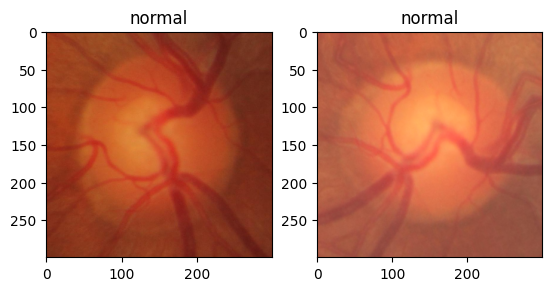

In [13]:
for image, label in rimone_image_label.unbatch():
    print(image.shape)
    plt.subplot(1, 2, 1)
    plt.imshow(image.numpy().astype('uint8'))
    plt.title(rimone_image_label.class_names[int(label.numpy())])
    plt.subplot(1, 2, 2)
    plt.imshow(test_layer(image).numpy())
    plt.title(rimone_image_label.class_names[int(label.numpy())])
    break

C:\Users\Bugi\AppData\Local\Temp\ipykernel_3048\4294481044.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(rimone_image_label.class_names[int(label.numpy())])
C:\Users\Bugi\AppData\Local\Temp\ipykernel_3048\4294481044.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(rimone_image_label.class_names[int(label.numpy())])


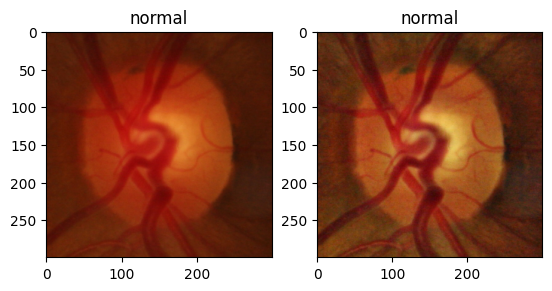

In [31]:
for image, label in rimone_image_label.unbatch():
    plt.subplot(1, 2, 1)
    plt.imshow(image.numpy().astype('uint8'))
    plt.title(rimone_image_label.class_names[int(label.numpy())])
    plt.subplot(1, 2, 2)
    plt.imshow(augment_image.clahe_augmentation(image=image,
                                                clip_limit=1.5).numpy().astype('uint8'))
    plt.title(rimone_image_label.class_names[int(label.numpy())])
    break

In [14]:
image_result

NameError: name 'image_result' is not defined

In [ ]:
image_result = tf.data.Dataset.from_tensors(image_result).batch(32)
image_result

<BatchDataset element_spec=TensorSpec(shape=(None, 317, 300, 300, 3), dtype=tf.float32, name=None)>

In [ ]:
augment_image.visualize_image(image_result, 2,1, 5,5, rimone_image_label.class_names)

In [ ]:
for batch_dataset in rimone_image_label:
    image, label = batch_dataset
    print(image.shape)
    break

(32, 300, 300, 3)


In [ ]:
temp_valu = 0
for image, label in rimone_image_label.take(len(rimone_image_label)):
    temp_valu += image.shape[0]
    # print(image.shape)
    # print(label.shape)
print(temp_valu)

349


In [ ]:
225+124

349

In [ ]:
for image, label in rimone_image_label:
    print(image.shape)
    print(label.shape)
    print(rimone_image_label.class_names[int(label[0])], label[0])
    break

(32, 300, 300, 3)
(32, 1)
glaukoma tf.Tensor([0.], shape=(1,), dtype=float32)


In [ ]:
rimone_image_label.class_names

['glaukoma', 'normal']

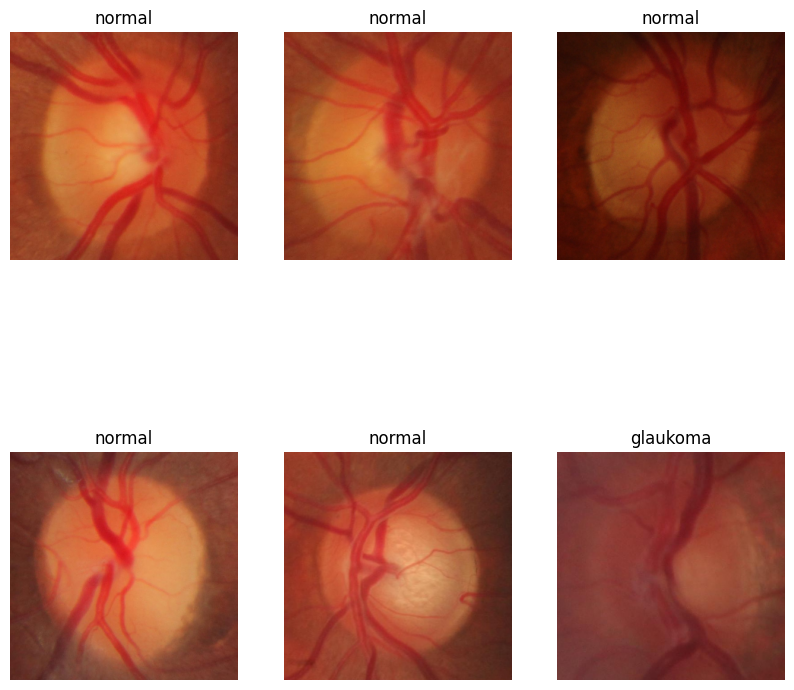

In [ ]:
augment_image.visualize_image(batch_dataset=rimone_image_label,
                            figure_column=3,
                            figure_row=2,
                            figure_size_height=10,
                            figure_size_width=10,
                            label_names=rimone_image_label.class_names)